<center><h2><u><i>PRINCIPLES OF ARTIFICIAL INTELLIGENCE</i></u></h2>
<p><i>PROJECT:ORCHID CLASSIFICATION</i></p>
<p style="font-size:small;">By: Amir Raif Bin Mizlan(52213223142)<br>Amir Keizrul Bin Mudzir (52213223121)<br>Ahmad Afif Abdul Hadi bin A Rahim (52213223199)</p>


<center>



Our Project will be separated by sections:
- Section: Data Preparation
- Section: Data Modelling
- Section: Data Visualization

<center style="font-size:larger;font-family:'Times New Roman', sans-serif;">SECTION: DATA PREPARATION</center><br><hr>

<center style="font-size:larger;font-family:'Times New Roman', sans-serif;">1. Collecting Data</center>

<p style="font-size:medium;">We will be using several libraries to scrape data for our selected topic:<br> <span style="color:violet;">Orchid</span> Classification.
<br>-"selenium" library will be used to automate web browser interactions, allowing us to access web pages and retrieve data such as the images we will be using.
<br>-"os" library will help us interact with the operating system, particularly for file management tasks.
<br>-"requests" library will enable us to make HTTP requests to download data or images.
<br>-"selenium.webdriver.common.by" and "selenium.webdriver.support.ui.WebDriverWait" modules, along with "expected_conditions" from selenium, will help us in <u>waiting for specific elements on the webpage to load before we scrape them.</u>
<br>-"Pillow"(PIL) library to process and manipulate any images that are part of the data we collect for the classification task.</p>

These are the <span style="color:red;">required</span> installation to continue on the project.

In [13]:
!pip install selenium
!pip install requests
!pip install pillow
!pip install tensorflow
!pip install -U scikit-learn scipy matplotlib

In [2]:
from selenium import webdriver
import os
import requests
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from PIL import Image
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import os
import time
import requests
from PIL import Image


Class: Apostasioideae
Downloaded image 1/2000
Downloaded image 2/2000
Downloaded image 3/2000
Downloaded image 4/2000
Downloaded image 5/2000
Downloaded image 6/2000
Downloaded image 7/2000
Downloaded image 8/2000
Downloaded image 9/2000
Downloaded image 10/2000
Downloaded image 11/2000
Downloaded image 12/2000
Downloaded image 13/2000
Downloaded image 14/2000
Downloaded image 15/2000
Downloaded image 16/2000
Downloaded image 17/2000
Downloaded image 18/2000
Downloaded image 19/2000
Downloaded image 20/2000
Downloaded image 21/2000
Downloaded image 22/2000
Downloaded image 23/2000
Downloaded image 24/2000
Error processing image 25: No connection adapters were found for ''
Error processing image 25: No connection adapters were found for ''
Downloaded image 25/2000
Error processing image 26: No connection adapters were found for ''
Error processing image 26: No connection adapters were found for ''
Error processing image 26: No connection adapters were found for ''
Error processing image
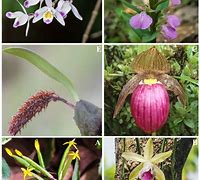
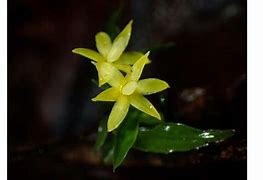
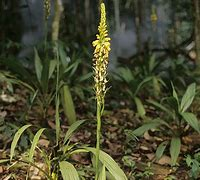
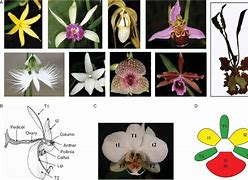
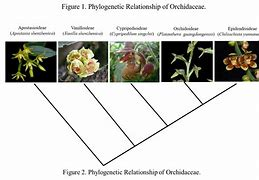
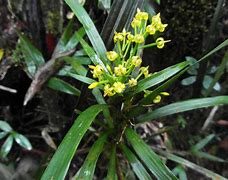
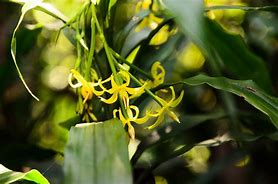
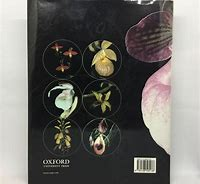
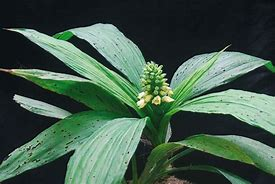
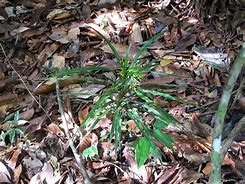
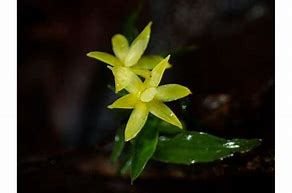
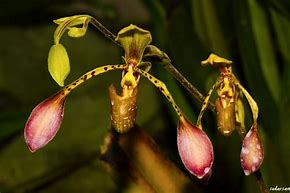
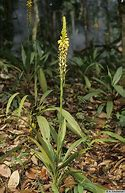
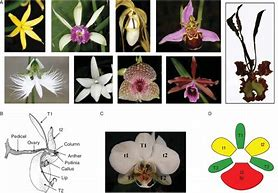
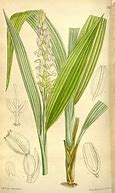
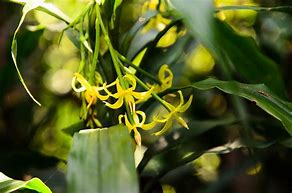
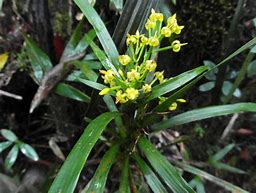
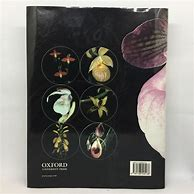
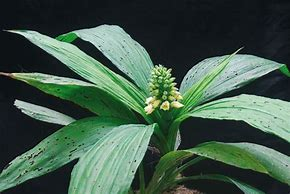
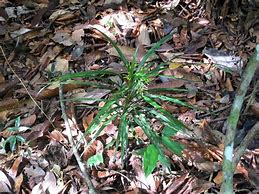
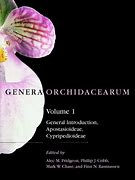
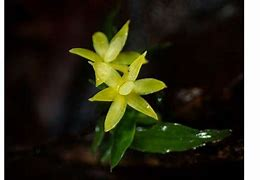
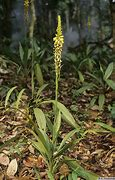
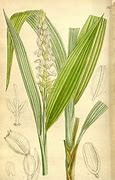
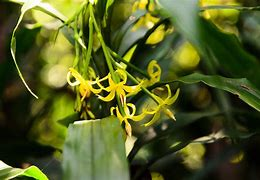
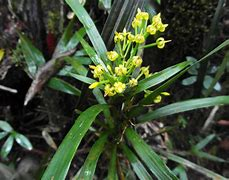
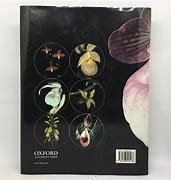
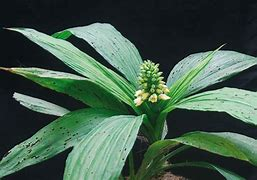
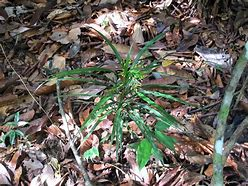
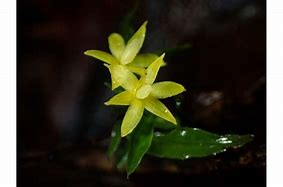
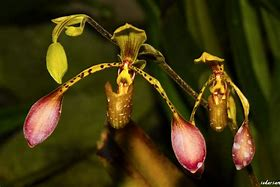
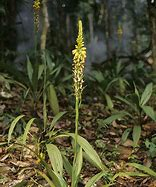
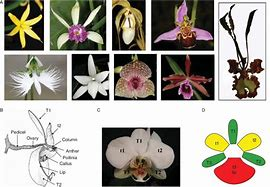
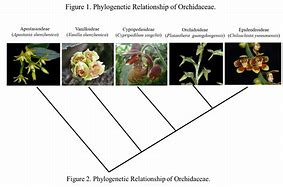
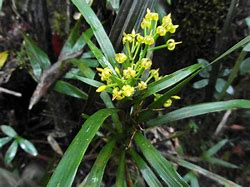
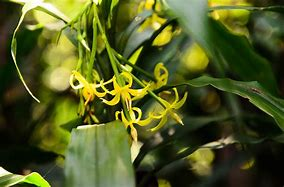
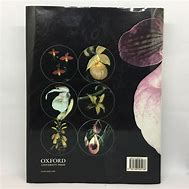
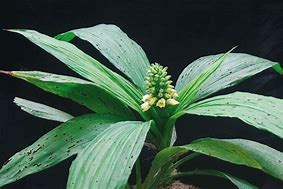
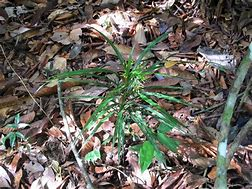
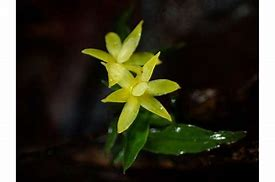
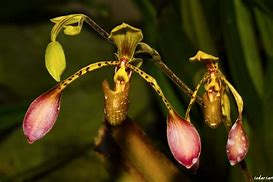
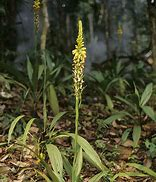
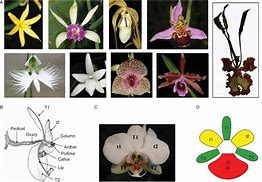
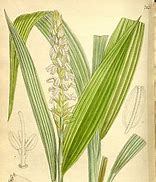
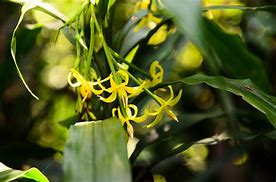
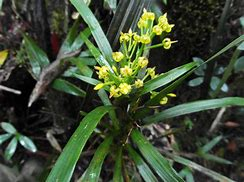
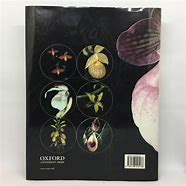
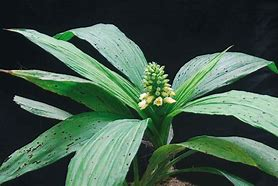
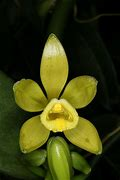
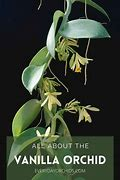
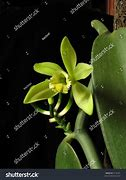
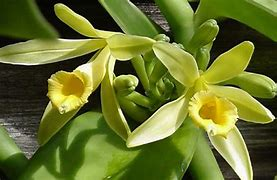
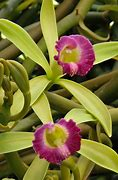
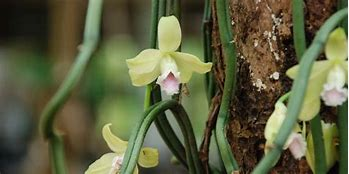
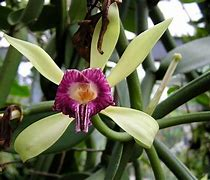
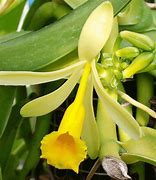
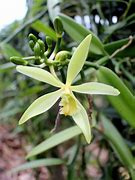
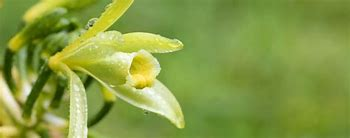
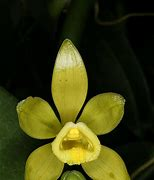
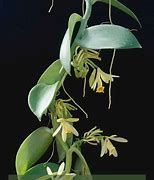
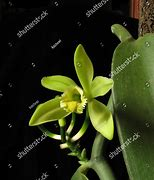
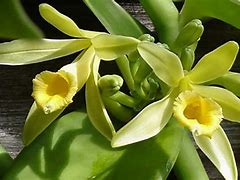
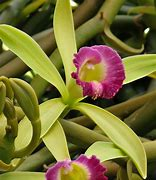
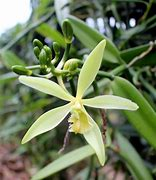
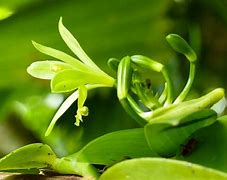
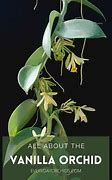
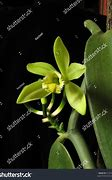
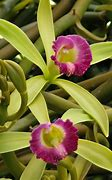
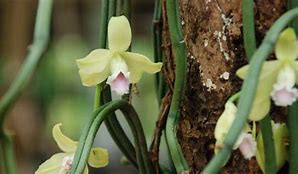
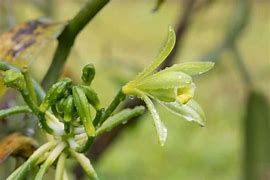
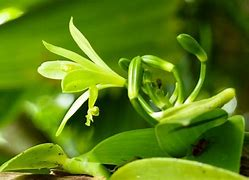
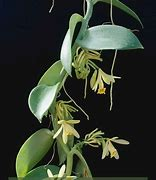
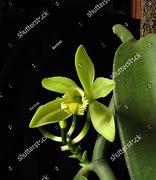
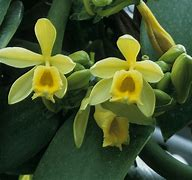
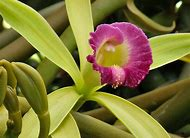
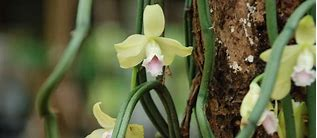
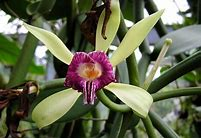
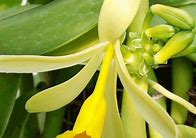
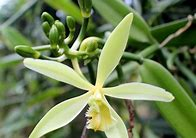
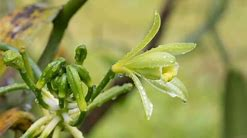
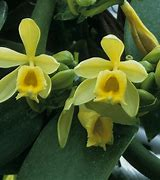
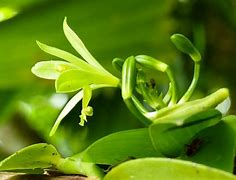
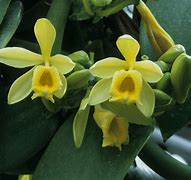
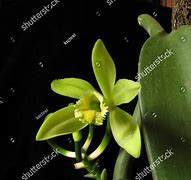
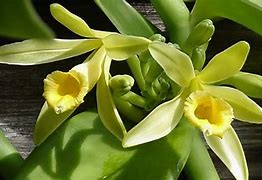
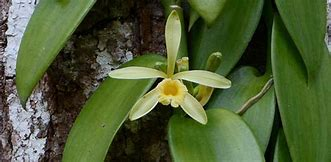
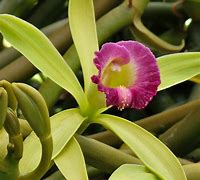
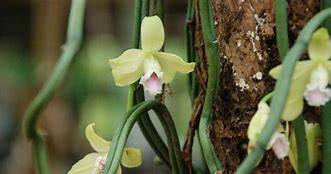
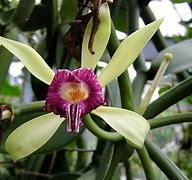
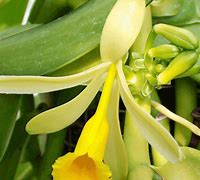
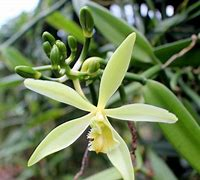
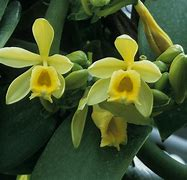
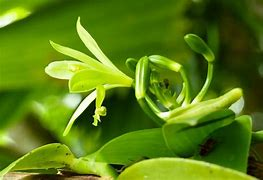
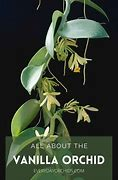
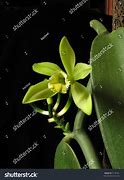
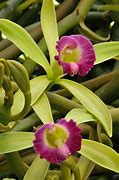
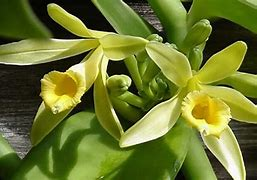
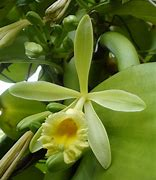
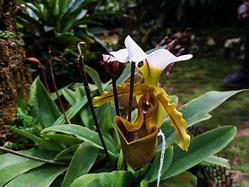
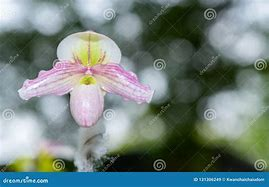
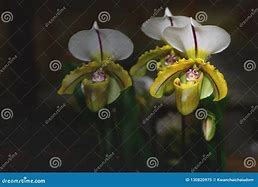
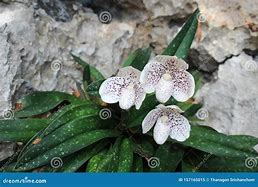
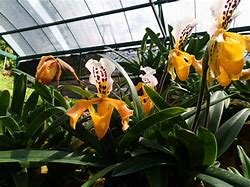
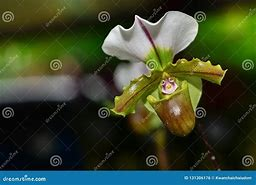
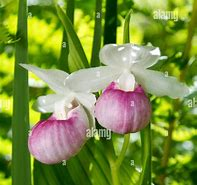
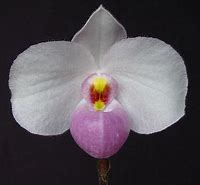
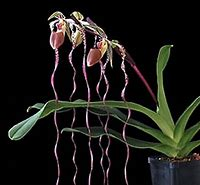
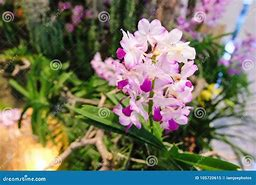
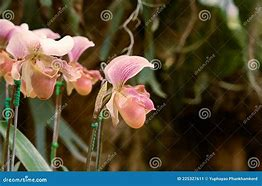
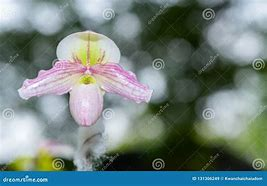
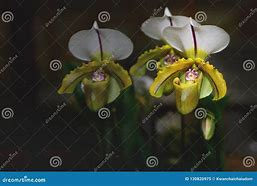
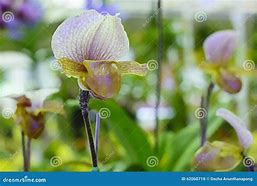
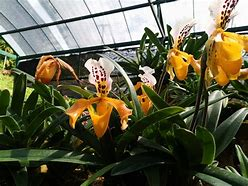
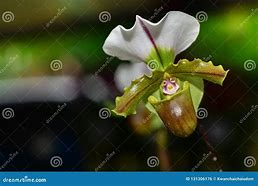
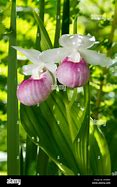
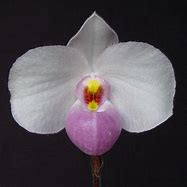
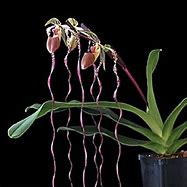
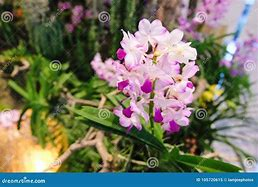
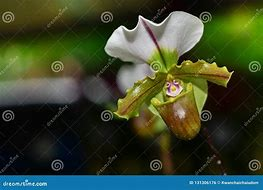
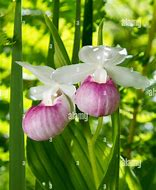
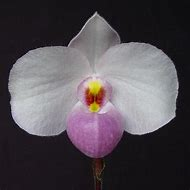
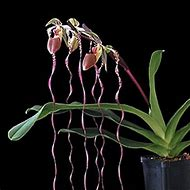
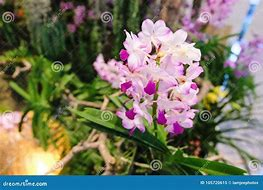
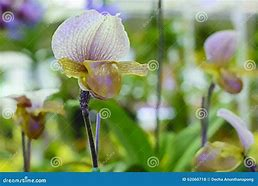
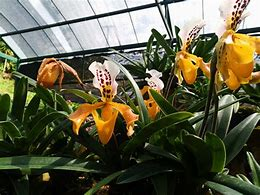
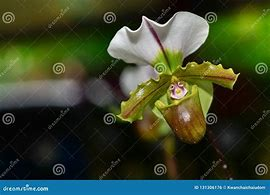
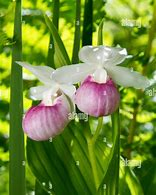
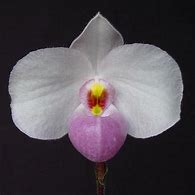
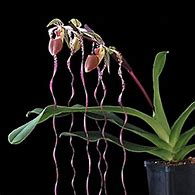
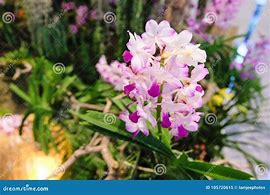
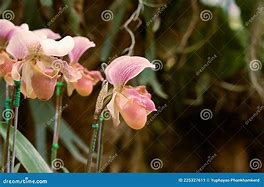
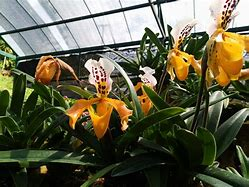
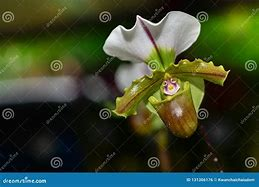
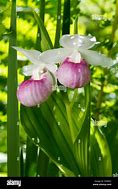
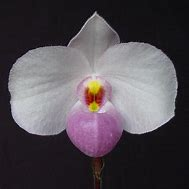
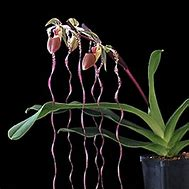
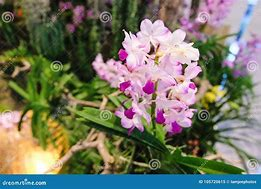
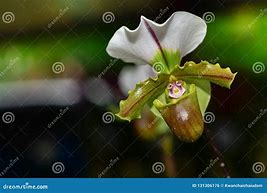
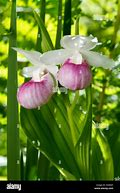
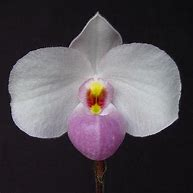
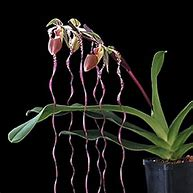
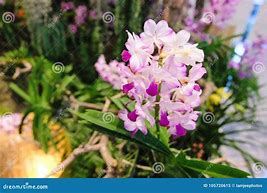
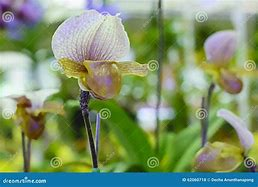
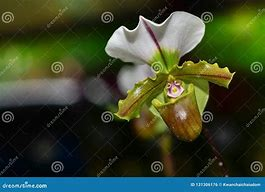
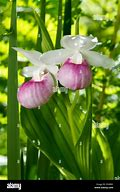
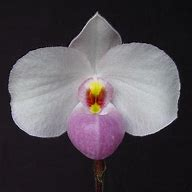
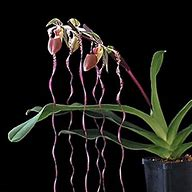
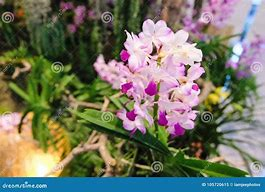
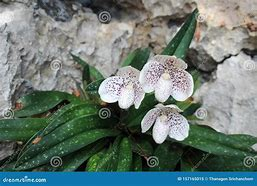
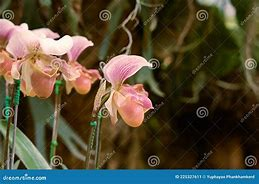
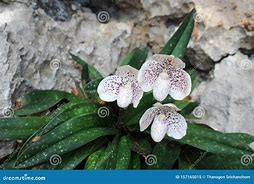
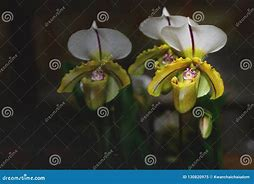
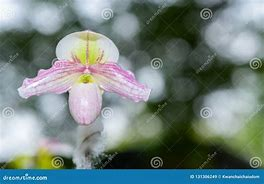
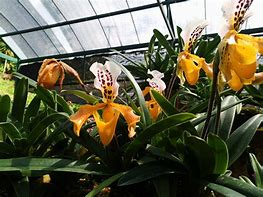
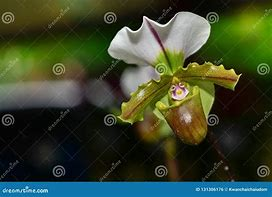
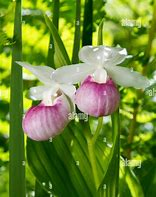
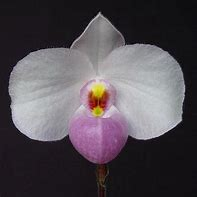
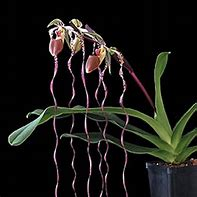
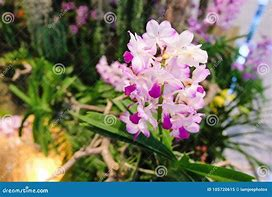
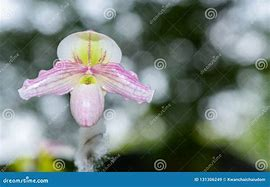
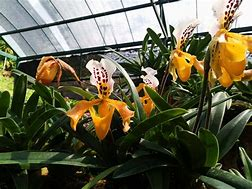
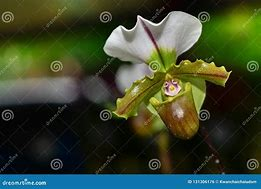
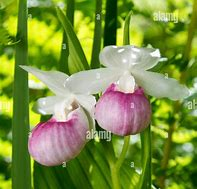
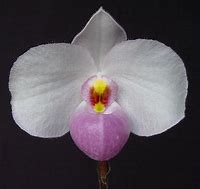
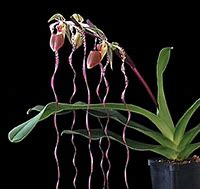
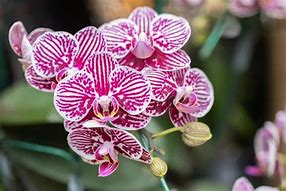
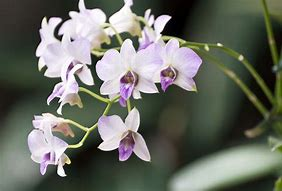
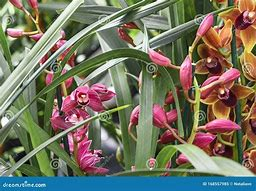
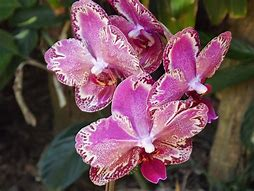
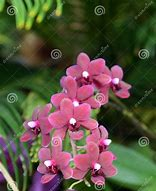
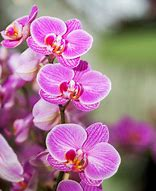
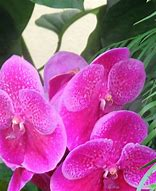
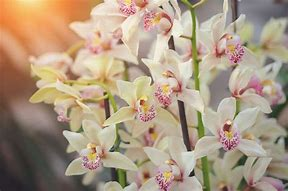
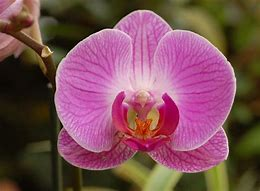
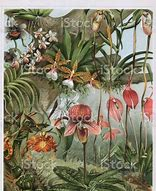
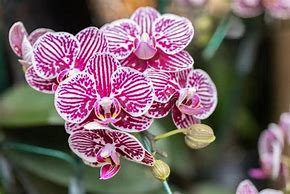
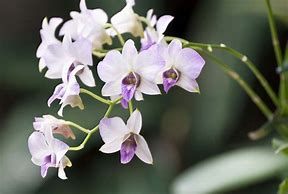
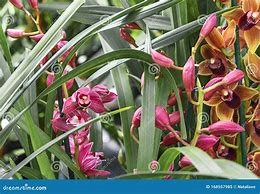
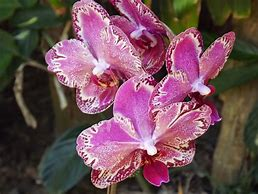
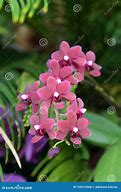
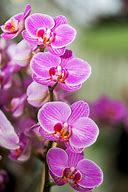
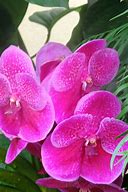
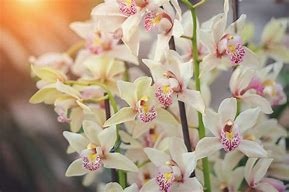
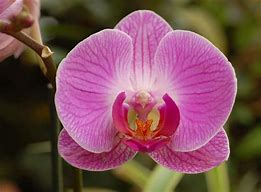
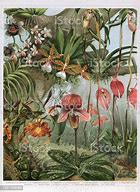
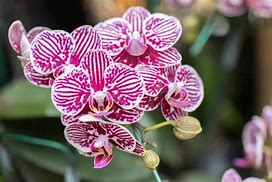
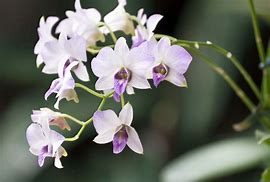
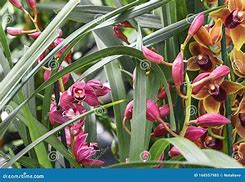
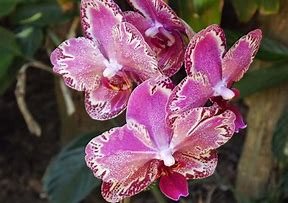
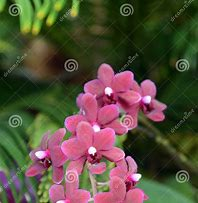
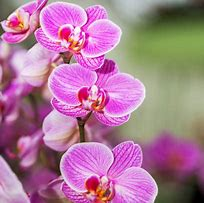
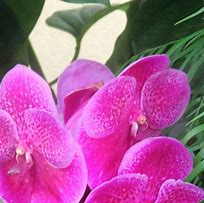
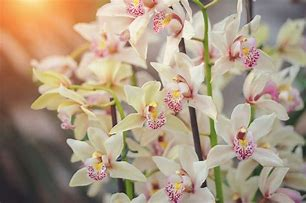
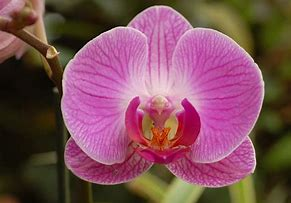
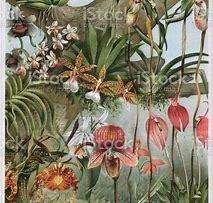
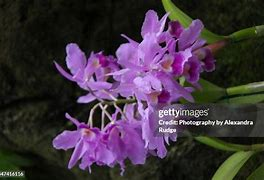
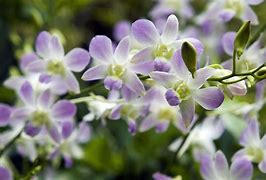
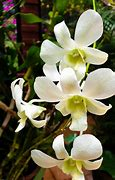
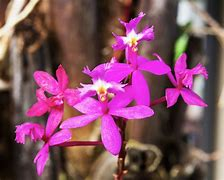
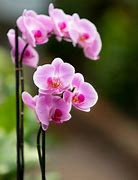
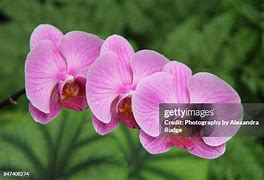
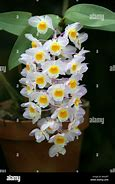
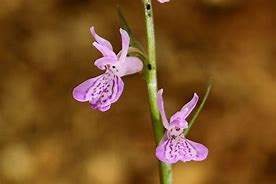
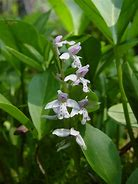
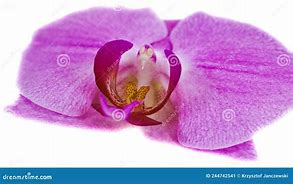
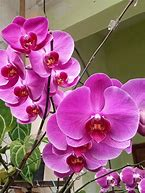
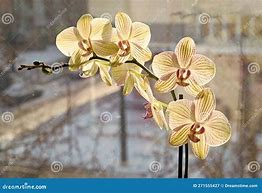
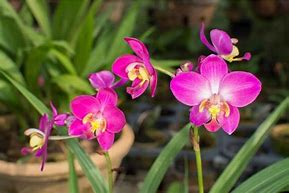
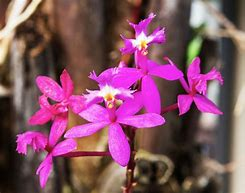
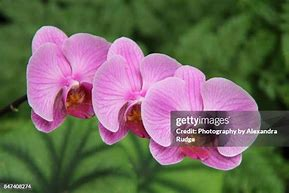
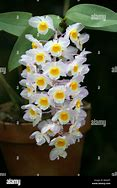
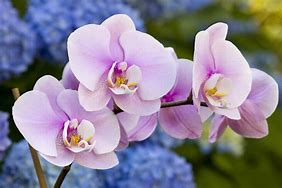
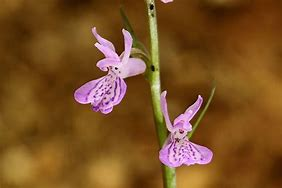
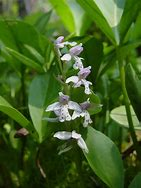
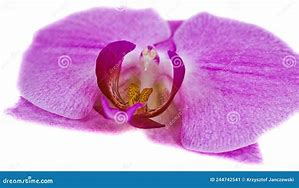
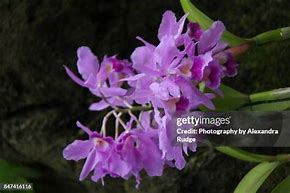
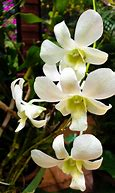
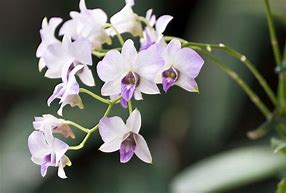
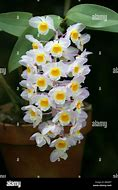
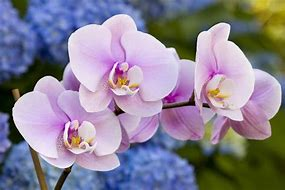
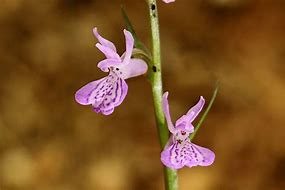
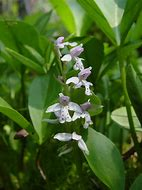
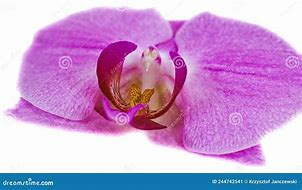
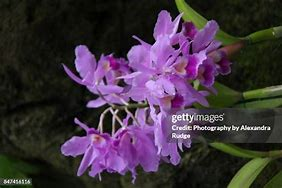
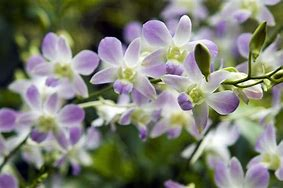
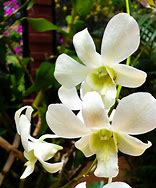
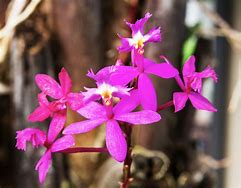
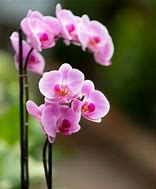
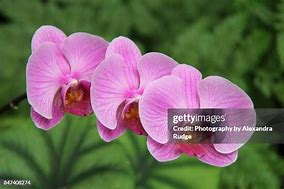
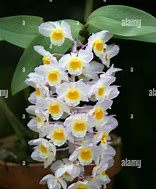
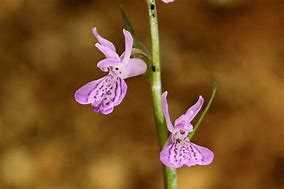
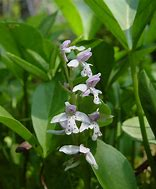
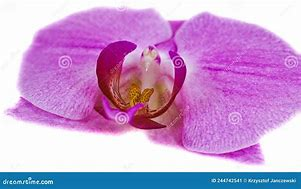
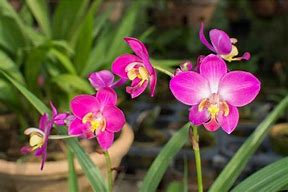
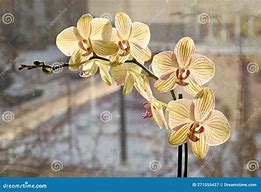
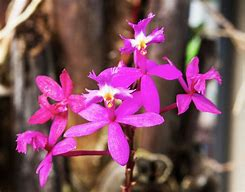
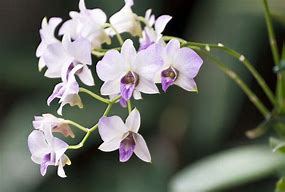
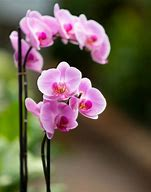
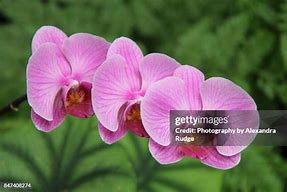
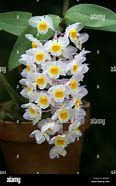
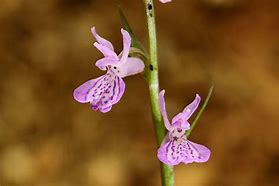
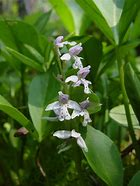
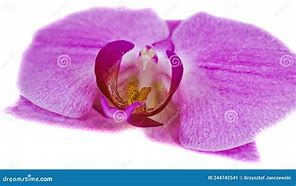
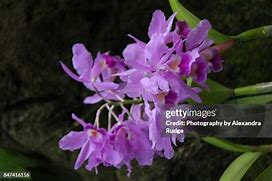
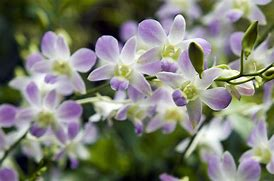
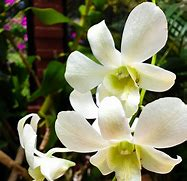
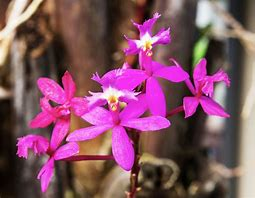
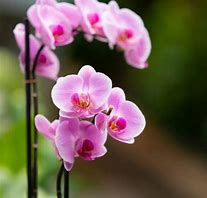
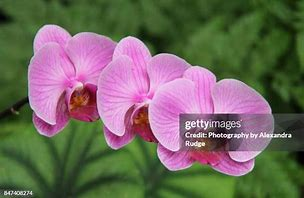
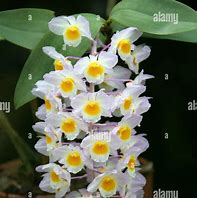
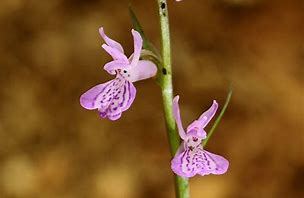
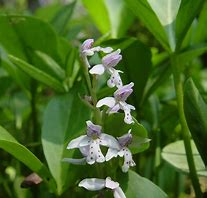
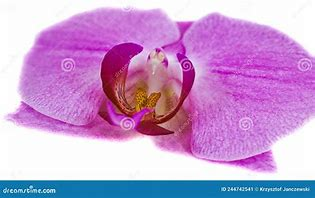
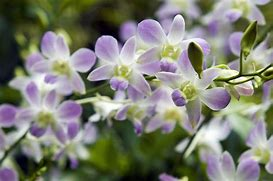
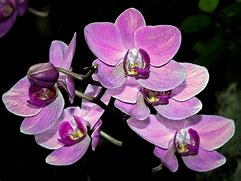
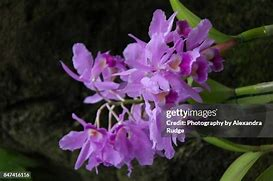
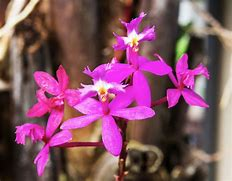
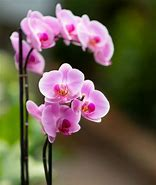
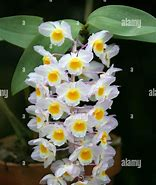
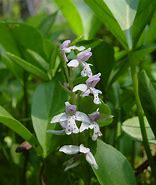
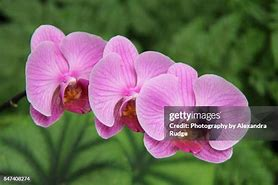
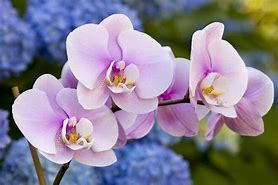
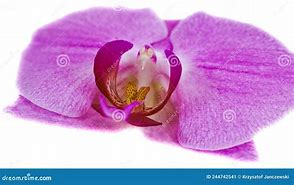
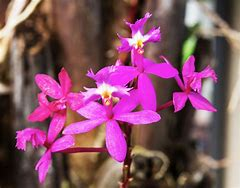
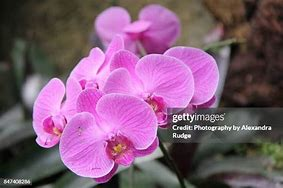
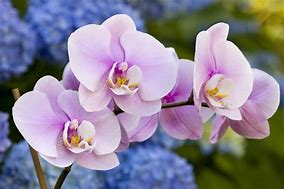
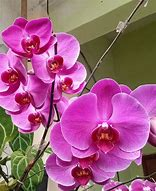
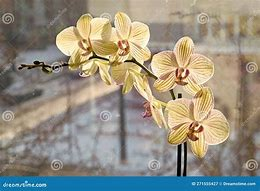
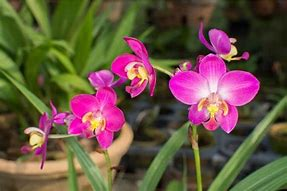
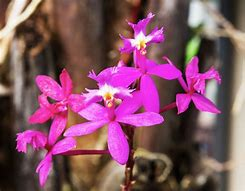
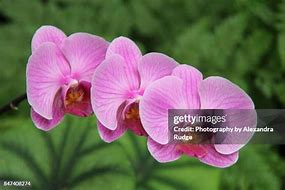
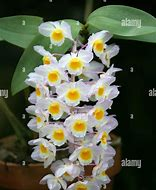
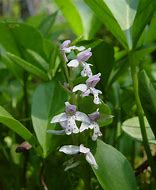
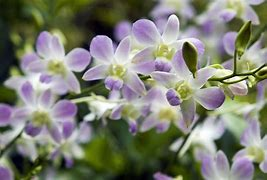
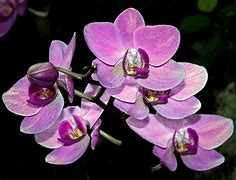
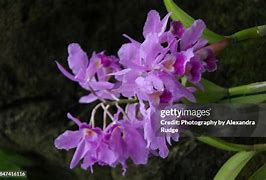
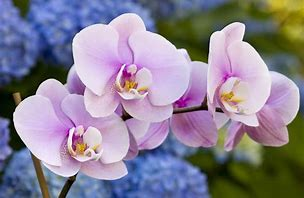
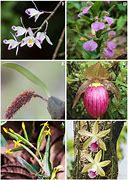
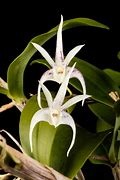
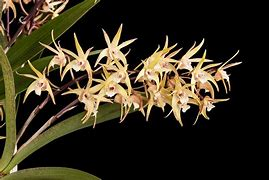
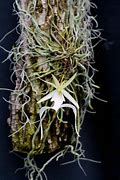
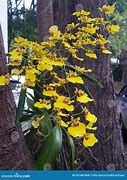
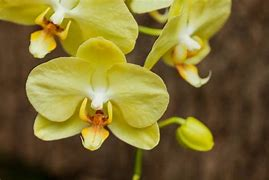
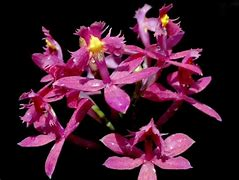
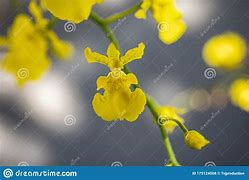
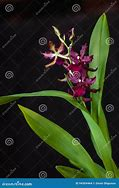
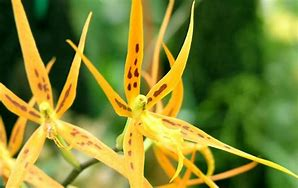
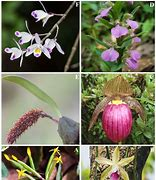
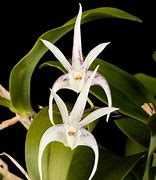
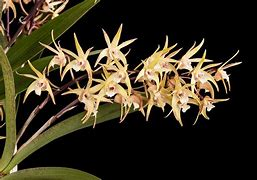
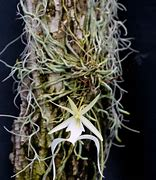
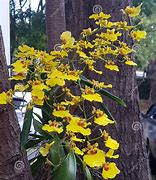
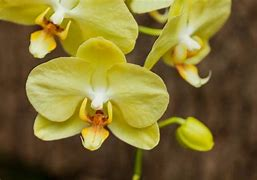
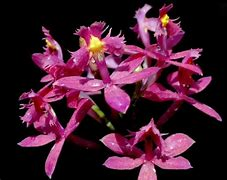
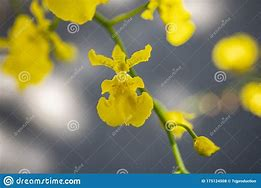
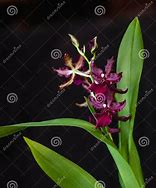
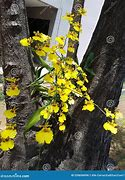
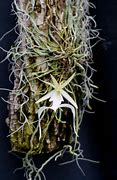
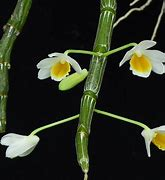
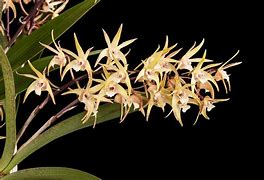
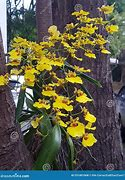
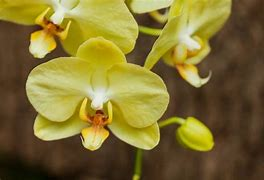
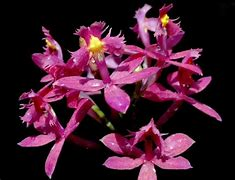
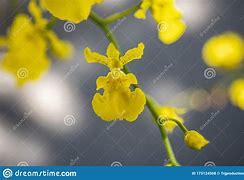
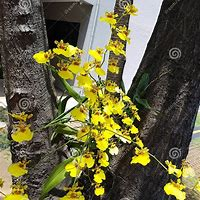
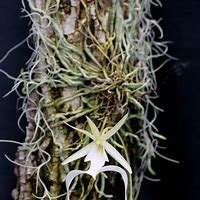
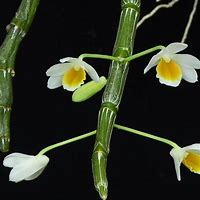
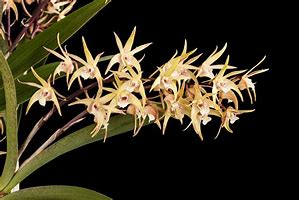
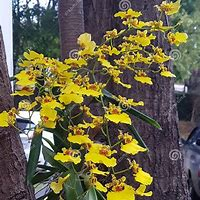
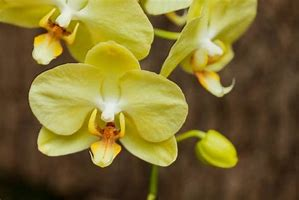
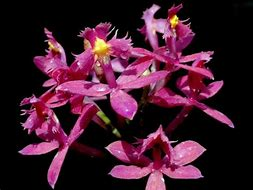
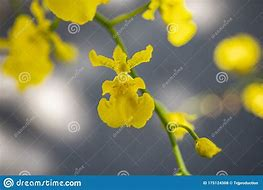
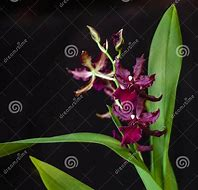
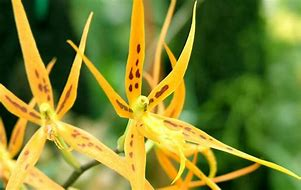
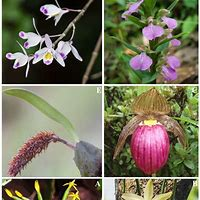
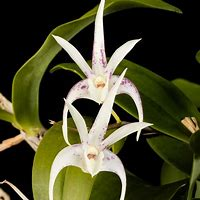
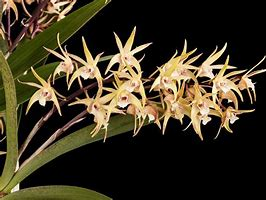
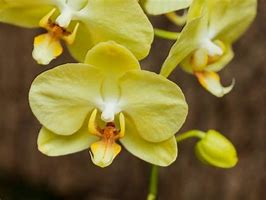
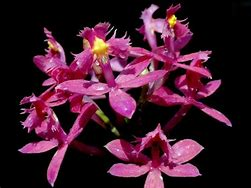
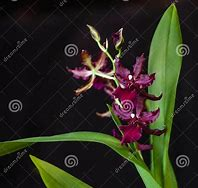
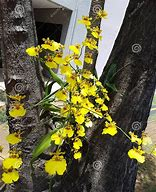
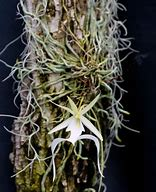
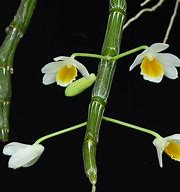
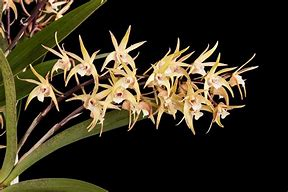
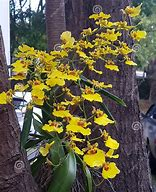
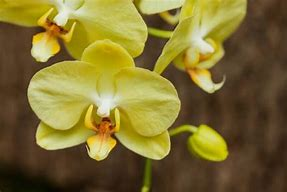
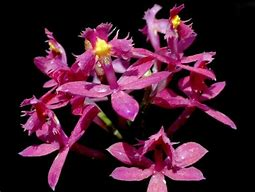
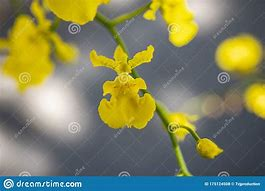
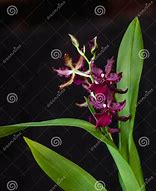
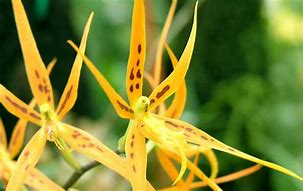
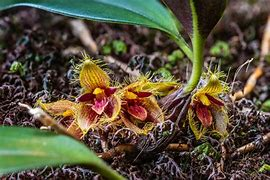
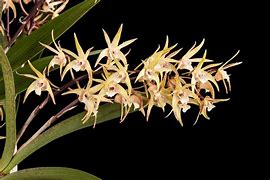
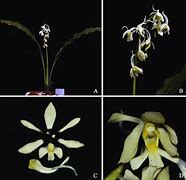
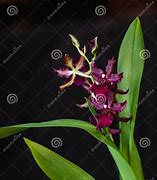
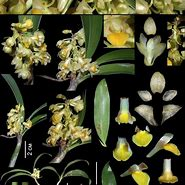
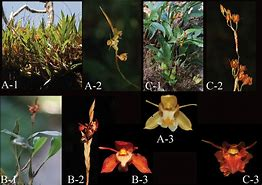
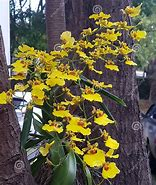

In [12]:
def create_new_driver():
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument("start-maximized")
    options.add_argument("disable-infobars")
    options.add_argument("--disable-extensions")
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-application-cache')
    options.add_argument('--disable-gpu')
    options.add_argument("--disable-dev-shm-usage")
    return webdriver.Chrome(options=options)
def imageScraper(query, NUM_IMAGES):
    save_path = os.path.join(os.getcwd(), "sample_data", query.replace(" ", "_"))
    os.makedirs(save_path, exist_ok=True)
    image_downloaded = 0
    downloaded_urls = set()

    while image_downloaded < NUM_IMAGES:
        driver = create_new_driver()
        try:
            driver.get("https://www.bing.com/images")
            search_bar = driver.find_element(By.NAME, "q")
            search_bar.send_keys(query)
            search_bar.send_keys(Keys.RETURN)
            time.sleep(3)
            for _ in range(5):
                driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                time.sleep(2)
            image_elements = driver.find_elements(By.CSS_SELECTOR, "img.mimg")
            for img in image_elements:
                if image_downloaded >= NUM_IMAGES:
                    break
                try:
                    img_url = img.get_attribute("src")
                    if img_url and img_url not in downloaded_urls:
                        downloaded_urls.add(img_url)
                        img_path = f"{save_path}/{query}_{image_downloaded + 1}.jpg"

                        try:
                            response = requests.get(img_url, stream=True, timeout=10)
                            with open(img_path, "wb") as file:
                                for chunk in response.iter_content(chunk_size=1024):
                                    if chunk:
                                        file.write(chunk)
                            print(f"Downloaded image {image_downloaded + 1}/{NUM_IMAGES}")
                        except requests.exceptions.ReadTimeout:
                            print(f"Timeout occurred while downloading image {image_downloaded + 1}. Skipping...")
                            continue
                        try:
                            with Image.open(img_path) as img:
                                img = img.resize((128, 128), Image.Resampling.LANCZOS)
                                img.save(img_path)
                        except Exception as e:
                            print(f"Error resizing image {image_downloaded + 1}: {e}")
                            continue

                        image_downloaded += 1
                except Exception as e:
                    print(f"Error processing image {image_downloaded + 1}: {e}")
            driver.refresh()
        except Exception as e:
            print(f"An error occurred: {e}")
        finally:
            driver.quit()
for class_name, query in orchid_classes.items():
    print(f"Class: {class_name}")
    imageScraper(query,2000)

There are 5 different subfamilies/classes of <span style="color:violet;">Orchids</span>
* 'Apostasioideae', 
* 'Vanilloideae', 
* 'Cypripedioideae', 
* 'Orchidoideae', 
* 'Epidendroideae'
<br>Set each paths for the classes.

<center style="font-size:larger;font-family:'Times New Roman', sans-serif;">3. Creating Dataset</center>

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.model_selection import train_test_split
import shutil
train_ratio = 0.70
valid_ratio = 0.15
test_ratio = 0.15

train_path =  os.path.join(os.getcwd(), "dataset", "train")
valid_path =  os.path.join(os.getcwd(), "dataset", "valid")
test_path =  os.path.join(os.getcwd(), "dataset", "test")

orchid_class = {
    "Apostasioideae",
    "Vanilloideae",
    "Cypripedioideae",
    "Orchidoideae",
    "Epidendroideae",
}
for split in ['train', 'valid', 'test']:
    for clname in orchid_class:
        os.makedirs(os.path.join("dataset", split, clname), exist_ok=True)
for clname in orchid_class:
    clpath = os.path.join("sample_data", clname)
    images = [f for f in os.listdir(clpath) if os.path.isfile(os.path.join(clpath, f))]
    train_images, temp_images = train_test_split(images, test_size=(valid_ratio + test_ratio), random_state=42)
    valid_images, test_images = train_test_split(temp_images, test_size=(test_ratio / (valid_ratio + test_ratio)), random_state=42)
    for img_name in train_images:
        shutil.move(os.path.join(clpath, img_name), os.path.join("dataset", 'train', clname, img_name))
    for img_name in valid_images:
        shutil.move(os.path.join(clpath, img_name), os.path.join("dataset", 'valid', clname, img_name))
    for img_name in test_images:
        shutil.move(os.path.join(clpath, img_name), os.path.join("dataset", 'test', clname, img_name))

print("Dataset organized successfully!")
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)\
                .flow_from_directory(directory=train_path, target_size=(224, 224), classes=orchid_class, batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)\
                .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=orchid_class, batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)\
                .flow_from_directory(directory=test_path, target_size=(224, 224), classes=orchid_class, batch_size=10, shuffle=False)

Dataset organized successfully!
Found 7061 images belonging to 5 classes.
Found 1540 images belonging to 5 classes.
Found 1538 images belonging to 5 classes.


For our dataset, we will be dividing them into 'train' 'test' and 'valid' with the following ratio:
* train_ratio = 70%
* valid_ratio = 15%
* test_ratio = 15%
<br>We will also be using vgg16 as our preprocessing function with a batch size of 10

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-117.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..149.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-122.68..146.061].
Clipping input data 

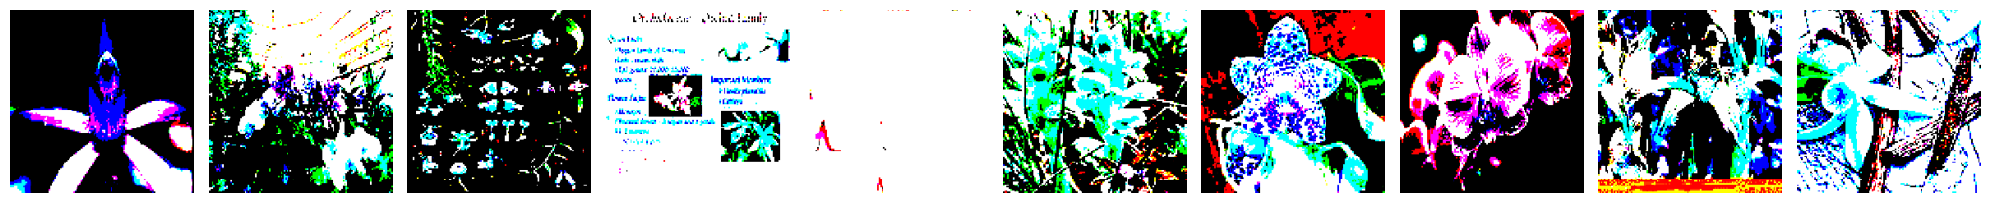

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [4]:
import matplotlib.pyplot as plt
imgs , labels = next(train_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize = (20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)